In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## **IMPORTING THE DATASET**

In [36]:
path ="/content/drive/MyDrive/dataset/creditcard.csv"
df= pd.read_csv(path)
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **DATA CLEANING**

In [78]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df= df.dropna()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
df.shape

(284807, 31)

# **EXPLORATORY DATA ANALYSIS**

In [42]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<ipython-input-84-1feecb989349>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='Set2')


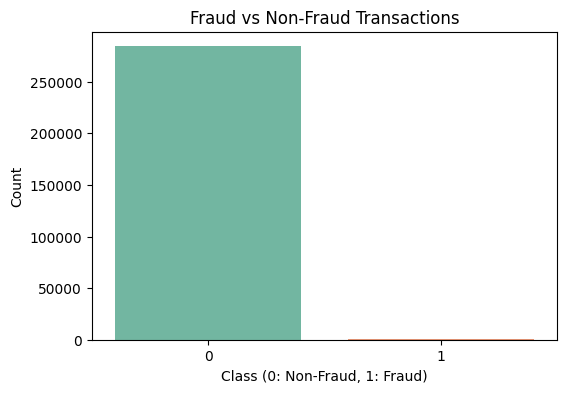

In [84]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

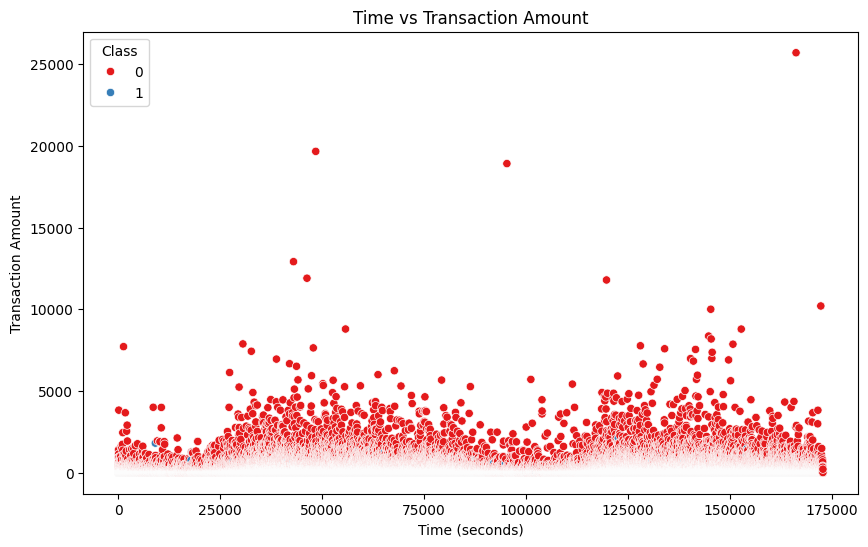

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

In [73]:
legit= df[df.Class==0]
fraud= df[df.Class==1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


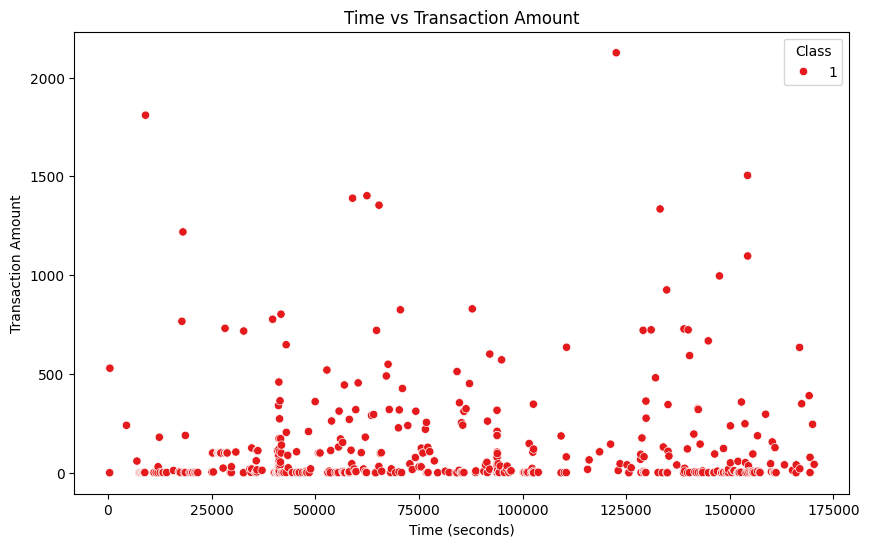

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

# **MODELLING**

In [76]:
new_df= pd.concat([legit.sample(n=492),fraud], axis=0)
X = new_df.drop('Class', axis=1)
Y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.2, random_state=42)

In [81]:
new_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**MACHINE LEARNING MODELS**

In [87]:
X = new_df.drop('Class', axis=1)
Y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.2, random_state=42)

The accuracy of the model is :92.89340101522842
The precision of the model is :92.0


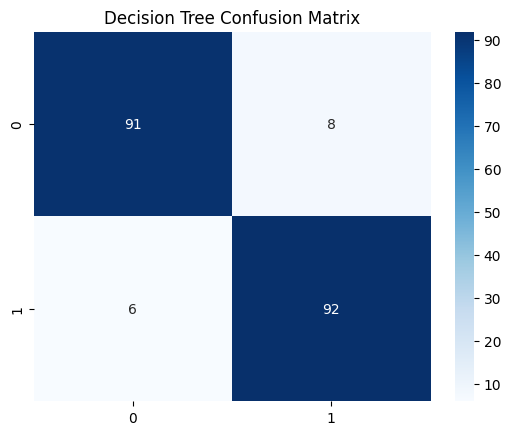

In [88]:
dc_model= DecisionTreeClassifier()
dc_model.fit(X_train,y_train)
predictions= dc_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
cm_dc = confusion_matrix(y_test, predictions)
print(f"The accuracy of the model is :{accuracy*100}")
print(f"The precision of the model is :{precision*100}")
sns.heatmap(cm_dc, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model is :95.43147208121827
The precision of the model is :94.94949494949495


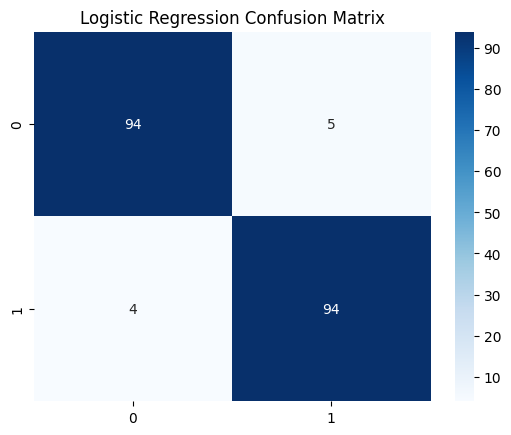

In [89]:
lr_model= LogisticRegression()
lr_model.fit(X_train,y_train)
predictions= lr_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
cm_lr = confusion_matrix(y_test, predictions)
print(f"The accuracy of the model is :{accuracy*100}")
print(f"The precision of the model is :{precision*100}")
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The accuracy of the model is :86.29441624365482
The precision of the model is :98.63013698630137


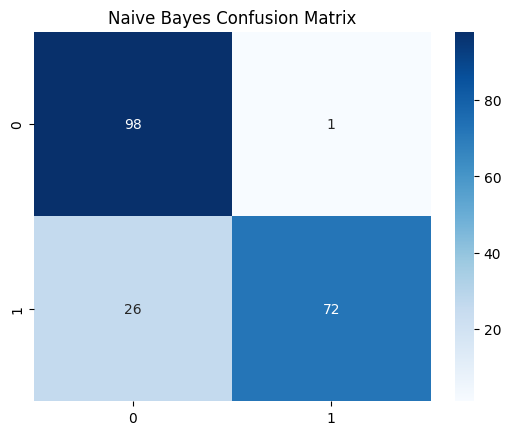

In [90]:
nb_model= GaussianNB()
nb_model.fit(X_train,y_train)
predictions= nb_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
cm_nb = confusion_matrix(y_test, predictions)
print(f"The accuracy of the model is :{accuracy*100}")
print(f"The precision of the model is :{precision*100}")
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

The accuracy of the model is :59.89847715736041
The precision of the model is :59.04761904761905


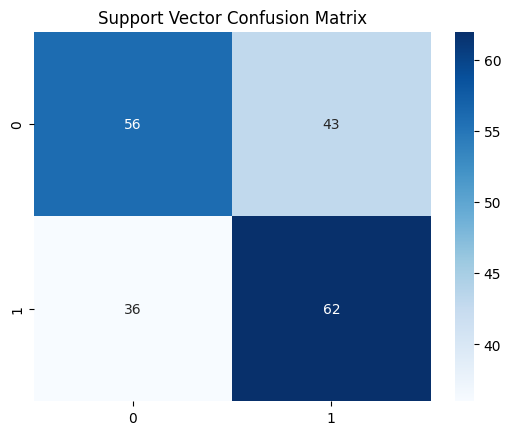

In [91]:
svc_model= SVC()
svc_model.fit(X_train,y_train)
predictions= svc_model.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
precision= precision_score(y_test,predictions)
cm_svc = confusion_matrix(y_test, predictions)
print(f"The accuracy of the model is :{accuracy*100}")
print(f"The precision of the model is :{precision*100}")
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Confusion Matrix')
plt.show()

The accuracy of the model is : 95.43147208121827 %
The precision of the model is : 95.87628865979381 %


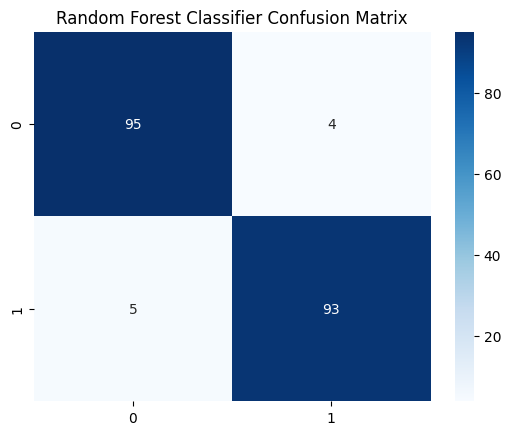

In [92]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
prediction_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test,prediction_rf)
precision_rf= precision_score(y_test,prediction_rf)
cm_rf = confusion_matrix(y_test, prediction_rf)
print(f"The accuracy of the model is : {accuracy_rf*100} %")
print(f"The precision of the model is : {precision_rf*100} %")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

**DEEP LEARNING MODEL(TENSOR FLOW)**

In [83]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(units=64, activation='relu', input_shape=[30]), # Add a hidden layer with ReLU activation
    Dense(units=1, activation='sigmoid') # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Use a different optimizer and loss function

# Train the model
model.fit(X_train, y_train, epochs=500)

# Make predictions
prediction = model.predict(X_test)
prediction = (prediction > 0.5).astype(int) # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"The accuracy of the model is : {accuracy * 100} %")


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4948 - loss: 0.7890   
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.4227  
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3575  
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: 0.3055 
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9155 - loss: 0.2628  
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.2303 
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9179 - loss: 0.2304 
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9392 - loss: 0.2012 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 0.2146  
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1903 
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9295 - loss: 0.1899 
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu